In [ ]:
#!pip install wordcloud
#!pip install spacy
#!pip install catboost


In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np
#import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
#from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
#spacy.load('en', parse=True, tag=True, entity=True)


## Modeling
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import learning_curve
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
#from sklearn.pipeline import Pipeline
#from sklearn.naive_bayes import MultinomialNB
#from catboost import CatBoostClassifier, Pool
#rom sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
#from xgboost import XGBClassifier
#from sklearn.dummy import DummyClassifier

## Warnings
#import warnings
#from scipy import stats
#warnings.filterwarnings('ignore')

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [ ]:
#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
location = 'E:/Amazon/Videos/04-04-2021/Use Case 2/archive/'
df_All = pd.read_csv(location+'reviews.csv')


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)


In [5]:
df_All.head(3)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ


In [6]:
df_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [7]:
df = df_All[['reviews.rating','reviews.text']]

In [8]:
#df.iloc[1:3, 0:2]
df.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


In [9]:
df.shape

(34660, 2)

In [10]:
df['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [11]:
df.isnull().sum()

reviews.rating    33
reviews.text       1
dtype: int64

In [ ]:
#df = df[df['EPS'].notna()]
#df[df.notna()].sum()


In [12]:
df = df.dropna()

In [13]:
df.shape

(34626, 2)

In [14]:
df[df["reviews.rating"] == 1][:1]


,reviews.rating,reviews.text
126,1.0,i Bought this around black friday for $60 hopi...


In [17]:
#df.style.set_properties(subset=["reviews.rating"], **{'width': '300px'})


In [18]:
df[df["reviews.rating"] == 1][:2].style.set_properties(subset=["reviews.rating"], **{'width': '300px'})

,reviews.rating,reviews.text
126,1.000000,"i Bought this around black friday for $60 hoping it would be awesome... it failed so hard i tried multiple different micro SD cards none of which were recognized and YES i formated them with every format i could think of ... Fat32, NTFS, Fat, Xfat... i even tried to have the tablet do it... didnt work... to make matters worse half the apps i wanted to use werent in the app store and i came to find out that it isnt linked to the normal google play store this tablet has its own app store which is missing many common apps... the main reason i bought this was to play clash of clans and i cant because it wasnt on the app store... i tried to also use aftermarket play stores to play COC but it didnt work... launched and played 1 time but didnt work or update after that... needless to say i returned it and bought a $250 samsung galaxy tab A 10.1 (2016 version) with S-pen and its WAYYYYY better... bottom line you get what you pay for... also hint the s-pen version has an extra 1 GB of ram over the non pen version... so you should get that if you can afford the extra $50..."
169,1.000000,I bought this tablet for my 4 year old daughter. Too many advertisements. I would rather pay more and not have a single ad.


In [19]:
df[df["reviews.rating"] == 2][:2].style.set_properties(subset=["reviews.rating"], **{'width': '300px'})

,reviews.rating,reviews.text
117,2.000000,Didn't have some of the features I was looking for. Returned it the next day. May be good for others
281,2.000000,Not a good product short battery life i can only use for 20 minutes


In [20]:
df[df["reviews.rating"] == 3][:2].style.set_properties(subset=["reviews.rating"], **{'width': '300px'})

,reviews.rating,reviews.text
222,3.000000,I was hoping to use Google launcher with this tablet but it is really locked down and you cannot change the launcher or the lock screen. Still cheap and fine for watching movies.
226,3.000000,"The tablet works fine. It is responsive with good resolution. It is too tied to Amazon. It requires too many hoops to get apps such as Zinio to work. Until Amazon loosens its grip, I recommend only at a very good price."


In [21]:
df[df["reviews.rating"] == 4][:2].style.set_properties(subset=["reviews.rating"], **{'width': '300px'})

,reviews.rating,reviews.text
3,4.000000,I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it is brighter then the ipad pro costing $900 base model. The build on this fire is INSANELY AWESOME running at only 7.7mm thick and the smooth glossy feel on the back it is really amazing to hold its like the futuristic tab in ur hands.
6,4.000000,"Great for e-reading on the go, nice and light weight, and for the price point given, definitely worth the purchase."


In [22]:
df[df["reviews.rating"] == 5][:2].style.set_properties(subset=["reviews.rating"], **{'width': '300px'})

,reviews.rating,reviews.text
0,5.000000,This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.
1,5.000000,great for beginner or experienced person. Bought as a gift and she loves it


Based on the examples that we have reviewed it seeems that reviews ratings 1,2,3 are negative while 4,5 are positive.

In [15]:
df['reviews.rating'].value_counts()

5.0    23774
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

In [16]:
print ('positive ', len (df[df["reviews.rating"].isin([4,5])]))
print ('negative ', len (df[df["reviews.rating"].isin([1,2,3])]))


positive  32315
negative  2311


We will create a new column to reflect positive and negative 

In [17]:
# will remap the values
dict = {5 :1 ,4 : 1, 3 : 0, 2 : 0, 1 : 0}

# Print the dictionary
print(dict)



{5: 1, 4: 1, 3: 0, 2: 0, 1: 0}


In [18]:
# Remap the values of the dataframe
df = df.replace({"reviews.rating": dict})


In [19]:
df['reviews.rating'].value_counts()

1.0    32315
0.0     2311
Name: reviews.rating, dtype: int64

<b>Observation<br> </b>

We observed that the data is imbalanced, to solve this problem we should consider the following:
    - We should consider using Stratified Kfolds in our models
    - We can use SMOTE for both up and down sampling
    
We will use both approaches in our models

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.rating  34626 non-null  float64
 1   reviews.text    34626 non-null  object 
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


In [21]:
df.isnull().sum()

reviews.rating    0
reviews.text      0
dtype: int64

In [22]:
#Randomly split the data into a test and train datasets 
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split (df["reviews.text"],                   
                                                 df['reviews.rating'],
                                                 test_size=0.25,                                                                   
                                                 random_state=0)

print ('        len: ' , len(train))
print (train[:5])
print (train_labels[:5])

        len:  25969
7741     My daughter is six years old, and she enjoying...
30131    I'm so happy with my purchase! Very easy to in...
25824    have set it up to control various devices and ...
29439    I love everything about it.... it is portable,...
6833     This was a great purchase i do not regret buyi...
Name: reviews.text, dtype: object
7741     1.0
30131    1.0
25824    1.0
29439    1.0
6833     1.0
Name: reviews.rating, dtype: float64


In [25]:
#It is important to note that the CountVectorizer performs lowercasing by default. 
vectorizer = CountVectorizer()#.fit(train)


In [26]:
train_vectorized = vectorizer.fit_transform(train)
train_vectorized

<25969x12223 sparse matrix of type '<class 'numpy.int64'>'
	with 610311 stored elements in Compressed Sparse Row format>

In [27]:
test_vectorized = vectorizer.fit_transform(test)
test_vectorized

<8657x7471 sparse matrix of type '<class 'numpy.int64'>'
	with 203494 stored elements in Compressed Sparse Row format>

In [28]:
def confusion_mat(predictions, labels):
    """
    predictor : Predictor object of model
    features: Input features to model
    label: Ground truth target values
    """

    accuracy = (predictions == labels).sum() / labels.shape[0]
    print(f'Accuracy: {accuracy}')
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predictions, average = 'binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')
    
    confusion_matrix = pd.crosstab(index=labels, columns=predictions, rownames=['Actual'], colnames=['Predicted']).astype(int)
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap="YlGnBu").set_title('Confusion Matrix')


In [29]:
#Load libraries needed for classification 
from sklearn import naive_bayes
from sklearn import metrics

In [30]:
#create a naive bayes classifier with Train Data
clfr = naive_bayes.MultinomialNB()
clfr.fit(train_vectorized,train_labels)
predicted = clfr.predict(train_vectorized)

acc = metrics.accuracy_score(train_labels,predicted)
print ('accuracy = '+str(acc*100)+'%')

#print (metrics.classification_report(test_labels,predicted))

accuracy = 94.69752397088837%


Accuracy: 0.9469752397088836
Precision: 0.9643161958951433
Recall: 0.9794022950548997
F1_score: 0.971800700374762


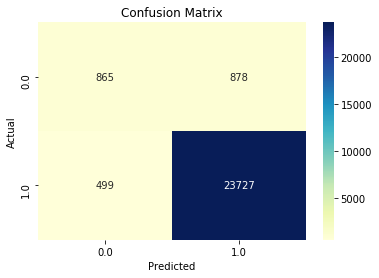

In [31]:
confusion_mat(predicted, train_labels)

In [34]:
#create a naive bayes classifier with Test Data
clfr = naive_bayes.MultinomialNB()
clfr.fit(test_vectorized,test_labels)
predicted = clfr.predict(test_vectorized)

acc = metrics.accuracy_score(test_labels,predicted)
print ('accuracy = '+str(acc*100)+'%')

#print (metrics.classification_report(test_labels,predicted))

accuracy = 95.22929421277578%


Accuracy: 0.9522929421277578
Precision: 0.9599712368168744
Recall: 0.9902336506366671
F1_score: 0.9748676443741252


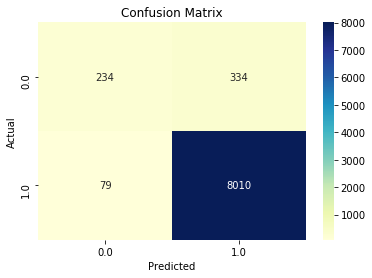

In [35]:
confusion_mat(predicted, test_labels)

In [60]:
SM = SMOTE(random_state=5)
Over_train,Over_train_labels= SM.fit_resample(train_vectorized,train_labels)


In [61]:
#create a naive bayes classifier with Train Data
clfr = naive_bayes.MultinomialNB()
clfr.fit(Over_train,Over_train_labels)
predicted = clfr.predict(Over_train)

acc = metrics.accuracy_score(Over_train_labels,predicted)
print ('accuracy = '+str(acc*100)+'%')

#print (metrics.classification_report(test_labels,predicted))

accuracy = 93.28201106249485%


In [ ]:
confusion_mat(predicted, train_labels)

### Experimenting with  some pre-processing 

In [39]:
# Reducing the number of features & making stopwords removal
count_vec = CountVectorizer(min_df=3, stop_words='english')#.fit(train)
print (len(vectorizer.get_feature_names()))
#train()

7471


In [40]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

#kfold = model_selection.KFold(n_splits=10, random_state=42)
kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)


#model=RandomForestClassifier(n_estimators=50) 

results = cross_validate (estimator=clfr,
                                          X=train_vectorized,
                                          y=train_labels,
                                          cv=kfold,
                                          scoring=scoring)


In [41]:
results

{'fit_time': array([0.01595545, 0.01598787, 0.01795459, 0.01695299, 0.01595664,
        0.01795387, 0.01496196, 0.01695514, 0.01496124, 0.01396227]),
 'score_time': array([0.00797796, 0.0089438 , 0.0109694 , 0.00997353, 0.00897765,
        0.01096964, 0.00797653, 0.00997305, 0.00698137, 0.0079782 ]),
 'test_accuracy': array([0.93993069, 0.93415479, 0.93068926, 0.92760878, 0.93299961,
        0.93107432, 0.92414324, 0.9322295 , 0.93646515, 0.93451464]),
 'test_precision': array([0.96058513, 0.95884271, 0.95276544, 0.95482295, 0.95544755,
        0.95169082, 0.95168494, 0.95428803, 0.95522388, 0.95623987]),
 'test_recall': array([0.97565002, 0.97111019, 0.97399917, 0.96822121, 0.97358646,
        0.97565002, 0.96779521, 0.97398844, 0.97770438, 0.97440132]),
 'test_f1_score': array([0.96805897, 0.96493746, 0.96326531, 0.96147541, 0.96443173,
        0.9635215 , 0.95967247, 0.9640376 , 0.9663334 , 0.96523517])}

In [71]:
SM = SMOTE(random_state=5)
Over_train,Over_train_labels= SM.fit_resample(train_vectorized,train_labels)


In [72]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

#kfold = model_selection.KFold(n_splits=10, random_state=42)
kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)


#model=RandomForestClassifier(n_estimators=50) 

results = cross_validate (estimator=clfr,
                                          X=Over_train,
                                          y=Over_train_labels,
                                          cv=kfold,
                                          scoring=scoring)


In [73]:
results

{'fit_time': array([0.03590274, 0.03590417, 0.03390765, 0.03390908, 0.03091693,
        0.03091669, 0.02992201, 0.03091955, 0.03095031, 0.03091669]),
 'score_time': array([0.01296568, 0.0169549 , 0.01196837, 0.01196909, 0.01197052,
        0.01196837, 0.01196742, 0.01199889, 0.01193619, 0.01296568]),
 'test_accuracy': array([0.92137846, 0.92860091, 0.92383901, 0.92321981, 0.92156863,
        0.92590299, 0.8623323 , 0.85737874, 0.86460268, 0.8627451 ]),
 'test_precision': array([0.90872698, 0.90966469, 0.90306122, 0.90231463, 0.90264091,
        0.90758294, 0.80974232, 0.80464625, 0.81135402, 0.81319073]),
 'test_recall': array([0.93685514, 0.95171275, 0.9496492 , 0.94923648, 0.94510937,
        0.94841106, 0.94715111, 0.94384806, 0.95004129, 0.94178365]),
 'test_f1_score': array([0.92257671, 0.9302138 , 0.92576946, 0.92518101, 0.9233871 ,
        0.92754793, 0.87307326, 0.86870606, 0.87523773, 0.87277597])}

In [74]:
print('List of possible accuracy:', np.mean(results['test_accuracy'])*100)
print('List of possible precision:', np.mean(results['test_precision'])*100)
print('List of possible recall:', np.mean(results['test_recall'])*100)
print('List of possible f1:', np.mean(results['test_accuracy'])*100)




List of possible accuracy: 89.91568631710129
List of possible precision: 86.72924710929217
List of possible recall: 94.63798111478458
List of possible f1: 89.91568631710129


In [42]:
# https://stackoverflow.com/questions/46598301/how-to-compute-precision-recall-and-f1-score-of-an-imbalanced-dataset-for-k-fold

# Print the output.
print('List of possible accuracy:', np.mean(results['test_accuracy'])*100)
print('List of possible precision:', np.mean(results['test_precision'])*100)
print('List of possible recall:', np.mean(results['test_recall'])*100)
print('List of possible f1:', np.mean(results['test_accuracy'])*100)




List of possible accuracy: 93.23809978682289
List of possible precision: 95.51591315440413
List of possible recall: 97.32106433903279
List of possible f1: 93.23809978682289


In [ ]:
#from colorama import Fore, Back, Style
#print(Fore.WHITE + 'some red text')
#print(Back.YELLOW + 'and with a green background')
#print(Style.BRIGHT + 'and in dim text')
#print(Style.RESET_ALL)
#print('back to normal now')


In [ ]:
#class color:
#   PURPLE = '\033[95m'
#   CYAN = '\033[96m'
#   DARKCYAN = '\033[36m'
#   BLUE = '\033[94m'
#   GREEN = '\033[92m'
#   YELLOW = '\033[93m'
#   RED = '\033[91m'
#   BOLD = '\033[1m'
#   UNDERLINE = '\033[4m'
#   END = '\033[0m'

#print(color.BOLD +Back.YELLOW + 'Hello World !' + color.END)

In [75]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix , classification_report
from sklearn.model_selection import StratifiedKFold
from colorama import Fore, Back, Style
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'




#kfold = model_selection.KFold(n_splits=10, random_state=42)
kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)



def acc_calc(vectorizer,model):
    

    train_vectorized = vectorizer.fit_transform(train)
    test_vectorized = vectorizer.fit_transform(test)

    
    def samples(train_set,train_set_labels):
        
        ### The train evaluation
        print(color.BOLD +Fore.WHITE+Back.BLUE + '\nAlgorithm Used \n' + color.END+str(model))
        print(color.BOLD +Back.YELLOW + '\nThe Train Model \n' + color.END)

        
        model.fit(train_set,train_set_labels)
        predicted_train = model.predict(train_set)
        print (metrics.classification_report(train_set_labels,predicted_train))
        
        plt.figure()
        confusion_mat(predicted_train, train_set_labels)

        print ("\n ")

    
        ### The Cross Validation evaluation
        
        scoring = {'accuracy' : make_scorer(accuracy_score), 
                   'precision' : make_scorer(precision_score),
                   'recall' : make_scorer(recall_score), 
                   'f1_score' : make_scorer(f1_score)}
    
    
        print(color.BOLD +Back.YELLOW + '\nThe Cross Validation Model\n' + color.END)
        results = cross_validate (estimator=clfr,
                                                  X=train_set,
                                                  y=train_set_labels,
                                                  cv=kfold,
                                                  scoring=scoring)

        print('Accuracy:', np.mean(results['test_accuracy']))
        print('Precision:', np.mean(results['test_precision']))
        print('Recall:', np.mean(results['test_recall']))
        print('F1:', np.mean(results['test_accuracy']))
        print ("\n ")


        ### The Test evaluation
        print(color.BOLD +Back.YELLOW + '\nThe Test Model\n' + color.END)
    
        model.fit(test_vectorized,test_labels)
        predicted = model.predict(test_vectorized)
        print (metrics.classification_report(test_labels,predicted))

        plt.figure()
        confusion_mat(predicted, test_labels)
        
        
        metrics.accuracy_score(test_labels,predicted)

        print ("\n ")

    
    def All_population():
        samples(train_vectorized,train_labels)

        
        
    def Oversampling():
        print(color.BOLD +Fore.WHITE+Back.BLUE + '\nOVERSAMPLING Used \n' + color.END)
        SM = SMOTE(random_state=5)
        Over_train,Over_train_labels= SM.fit_resample(train_vectorized,train_labels)

        samples(Over_train,Over_train_labels)
    
    
    def Undersampling():
        print(color.BOLD +Fore.WHITE+Back.BLUE + '\nUNDERSAMPLING Used \n' + color.END)
           
        undersample = RandomUnderSampler(sampling_strategy=0.5)
        Under_train,Under_train_labels = undersample.fit_resample(train_vectorized,train_labels)

        #undersample = RandomUnderSampler(sampling_strategy='majority')
        
        samples(Under_train,Under_train_labels)

        
    All_population()
    Oversampling()
    Undersampling()


Algorithm Used 
MultinomialNB()

The Train Model 

              precision    recall  f1-score   support

         0.0       0.54      0.53      0.54      1743
         1.0       0.97      0.97      0.97     24226

    accuracy                           0.94     25969
   macro avg       0.75      0.75      0.75     25969
weighted avg       0.94      0.94      0.94     25969

Accuracy: 0.9380030035811929
Precision: 0.966386208034315
Recall: 0.9671840171716338
F1_score: 0.966784948011223

 

The Cross Validation Model

Accuracy: 0.9263739629642593
Precision: 0.9591062465465656
Recall: 0.9621069314745524
F1: 0.9263739629642593

 

The Test Model

              precision    recall  f1-score   support

         0.0       0.61      0.52      0.56       568
         1.0       0.97      0.98      0.97      8089

    accuracy                           0.95      8657
   macro avg       0.79      0.75      0.77      8657
weighted avg       0.94      0.95      0.94      8657

Accuracy: 0.94686380

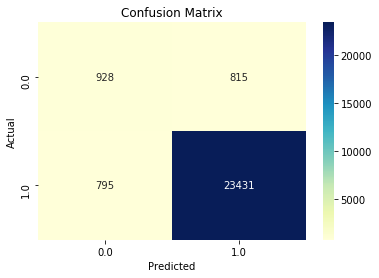

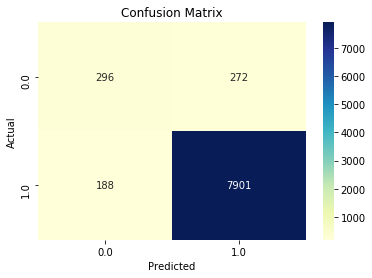

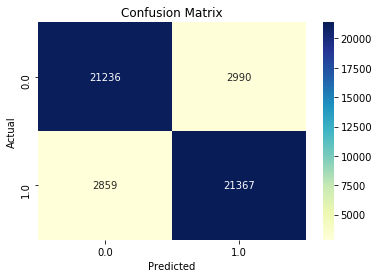

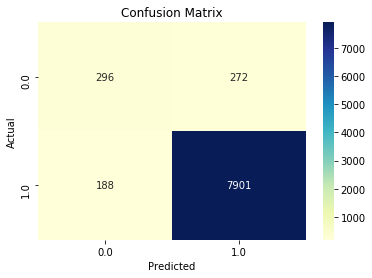

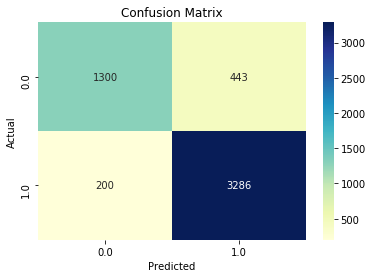

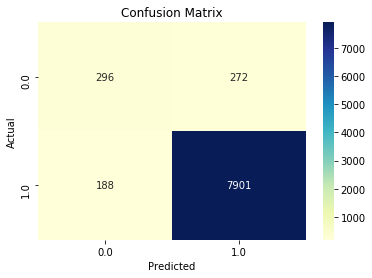

In [76]:
acc_calc(count_vec , naive_bayes.MultinomialNB())

In [60]:
# Let's try using a stemmer to see the difference
from nltk.stem.porter import PorterStemmer
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

In [61]:
#Apply Stemming 
Count_vec_n_gram = CountVectorizer( tokenizer=tokenize, min_df=2,ngram_range= (1,2))#.fit(train)



Algorithm Used 
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

The Train Model 

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71      1743
         1.0       0.98      0.98      0.98     24226

    accuracy                           0.96     25969
   macro avg       0.83      0.86      0.84     25969
weighted avg       0.96      0.96      0.96     25969

Accuracy: 0.959798220955755
Precision: 0.9808745436442085
Recall: 0.9759349459258648
F1_score: 0.9783985102420857

 

The Cross Validation Model

Accuracy: 93.23809978682289
Precision: 95.51591315440413
Recall: 97.32106433903279
F1: 93.23809978682289

 

The Test Model

              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75       568
         1.0       0.98      0.99      0.98      8089

    accuracy                           0.97      8657
   macro avg       0.89      0.85      0.87      8657
weighted avg       0.97      0.97  

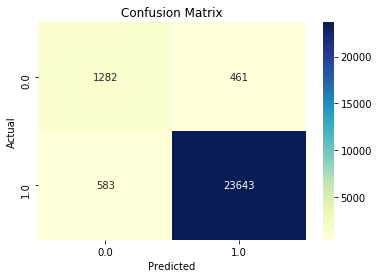

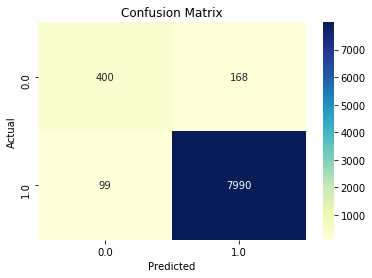

In [134]:
acc_calc(Count_vec_n_gram , naive_bayes.MultinomialNB())

In [ ]:
###################


Algorithm Used 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.06, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

The Train Model 

              precision    recall  f1-score   support

         0.0       0.93      0.31      0.46      1743
         1.0       0.95      1.00      0.97     24226

    accuracy                           0.95     25969
   macro avg       0.94      0.65      0.72     25969
weighted avg       0.95      0.95      0.94     25969

Accuracy: 0.952058223266202
Precision: 0.9525065963060686
Recall: 0.9983901593329481
F1_score: 0.9749088050948226

 

The Cross Validation Model

Accuracy: 93.2380997

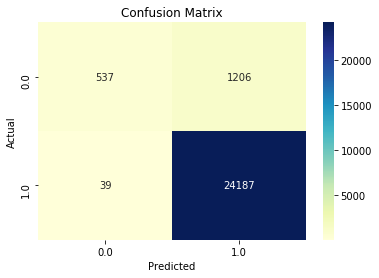

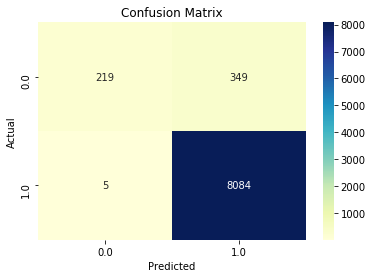

In [135]:
# Let's try with XGBOOST

acc_calc(Count_vec_n_gram , xgb.XGBClassifier(n_jobs=4,n_estimators=600, learning_rate=0.06))


In [136]:
count_vec2 = CountVectorizer(min_df=5, stop_words='english')



Algorithm Used 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.06, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

The Train Model 

              precision    recall  f1-score   support

         0.0       0.91      0.21      0.35      1743
         1.0       0.95      1.00      0.97     24226

    accuracy                           0.95     25969
   macro avg       0.93      0.61      0.66     25969
weighted avg       0.94      0.95      0.93     25969

Accuracy: 0.9458585236243213
Precision: 0.9464355583378982
Recall: 0.9984727152645918
F1_score: 0.9717579945363973

 

The Cross Validation Model

Accuracy: 93.238099

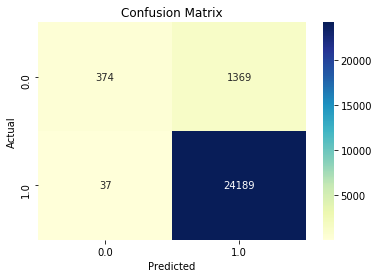

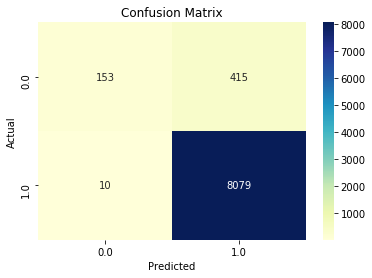

In [139]:
acc_calc(count_vec2, xgb.XGBClassifier(n_jobs=4,n_estimators=600, learning_rate=0.06))



Algorithm Used 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=50,
              gamma=0, learning_rate=0.06, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

The Train Model 

              precision    recall  f1-score   support

         0.0       0.91      0.21      0.35      1743
         1.0       0.95      1.00      0.97     24226

    accuracy                           0.95     25969
   macro avg       0.93      0.61      0.66     25969
weighted avg       0.94      0.95      0.93     25969

Accuracy: 0.9458585236243213
Precision: 0.9464355583378982
Recall: 0.9984727152645918
F1_score: 0.9717579945363973

 

The Cross Validation 

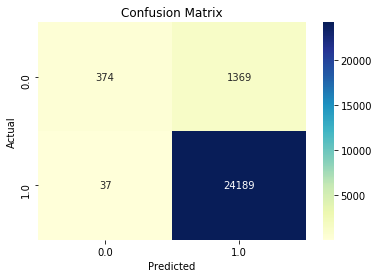

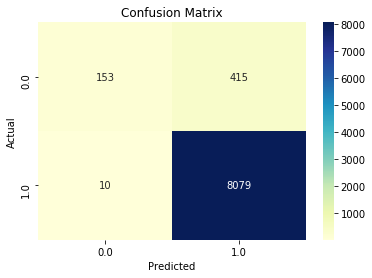

In [144]:
# Let's try early stopping adding to the Cross Validation to ensure no overfitting
acc_calc(count_vec2, xgb.XGBClassifier(n_jobs=4,n_estimators=600, learning_rate=0.06,early_stopping_rounds=50))



Algorithm Used 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The Train Model 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1743
         1.0       1.00      1.00      1.00     24226

    accuracy                           1.00     25969
   macro avg       1.00      1.00      1.00     25969
weighted avg       1.00      1.00      1.00     25969

Accuracy: 0.9997689552928491
Precision: 0.9997523935292175
Recall: 1.0
F1_score: 0.99987618

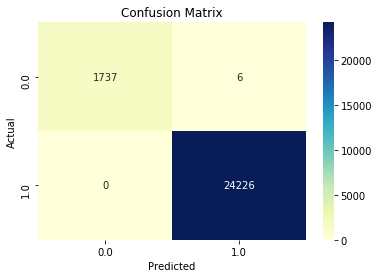

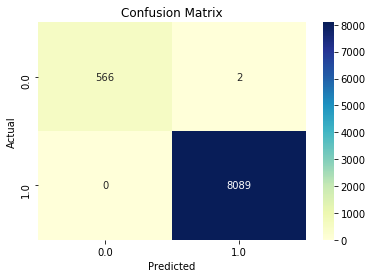

In [145]:
acc_calc(count_vec2, RandomForestClassifier(n_estimators=50))


In [ ]:
# words = train, test, train_labels, test_labels

vectorizer = TfidfVectorizer()#.fit(train)
#print (len(vectorizer.get_feature_names()))
acc_calc()

In [ ]:
vectorizer = TfidfVectorizer( min_df=4,  stop_words='english',lowercase=True ).fit(train)
acc_calc()


In [ ]:
df.info()

In [ ]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
rate = df['reviews.rating']==1
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white').generate(str(df[rate]['reviews.text']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1200)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True)
arr = []
for train_idx, val_idx in kf.split(df["reviews.text"], df["reviews.rating"]):
    train_data = df["reviews.text"].iloc[train_idx]
    train_label = df["reviews.rating"].iloc[train_idx]
    val_data = df["reviews.text"].iloc[val_idx]
    val_label = df["reviews.rating"].iloc[val_idx]
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    X_val = vectorizer.transform(val_data)
    clfr = naive_bayes.MultinomialNB()
    clfr.fit(X_train,train_label)
    predicted = clfr.predict(X_val)
    acc = metrics.accuracy_score(val_label,predicted)  
    arr.append(acc)
    print('accuracy = '+str(acc*100)+'%')


In [ ]:
print('avg accuracy = '+str(sum(arr)/5*100)+'%')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [ ]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [ ]:
vectorizer = CountVectorizer(min_df=3 ).fit(train)

In [ ]:
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(test)
count_vect_test = count_vect_test.toarray()

In [ ]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [ ]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

In [ ]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

In [ ]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(train, train_labels)
y_pred = clf.predict(train)
score = f1_score(train_labels,  y_pred , average = 'weighted')

# Printing evaluation metric (f1-score)
print("f1 score: {}".format(score))

In [ ]:
# Compute and print the classification report
print(classification_report(train_labels, y_pred))

Let's try using word2vec

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
location = 'E:/Amazon/GoogleNews-vectors-negative300.bin/'

word2vec_model = KeyedVectors.load_word2vec_format(location + 'GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
df[:2]

In [ ]:
### Convert tweets to arrays
reviews_raw_arr = np.array(df)
reviews = reviews_raw_arr

In [ ]:
reviews[0]

In [ ]:
#### convert the model into vectors to search for the words in the Model

word_vectors = word2vec_model.wv

All_reviews_vector = []
reviewNo = 0
c = 0

for review in reviews: 
    counter = 0
    review_vector = []
    review_vector_shape = []
    words = review[1].split()
    
    for word in words:
        if word in word_vectors.vocab:
            review_vector.append(word2vec_model[word])
            counter +=1
    review_vector = np.array(review_vector)
    review_vector.reshape(-1,1)
    review_vector_shape = review_vector
    
    
    if counter != 0:
        All_reviews_vector.append (sum (review_vector_shape)/counter)
    
    else:        
        review_vector_shape
        All_reviews_vector.append (np.zeros(300))


In [ ]:
All_reviews_vector = np.array(All_reviews_vector)
All_reviews_vector.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(All_reviews_vector)
my_reviews = scaler.transform(All_reviews_vector)


In [ ]:
# model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

In [ ]:
reviews_train,reviews_test,train_labels,test_labels = train_test_split(my_reviews,                   
                                                 df['reviews.rating'], test_size=0.30,
                                                 random_state=0)

In [ ]:
#eval_set = [(reviews_test, test_labels)]
fit_params={'early_stopping_rounds': 10, 
            'eval_metric': 'logloss',
            'verbose': False,
            'eval_set': [[reviews_test, test_labels]]}

clfr = naive_bayes.MultinomialNB()
clfr.fit(reviews_train,train_labels)

predicted = clfr.predict(reviews_test)
acc = metrics.accuracy_score(test_labels,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(test_labels,predicted))

In [ ]:
xgb_model = xgb.XGBRegressor(n_jobs=4,n_estimators=600, learning_rate=0.06)

fit_params={'early_stopping_rounds': 10, 
            'eval_metric': 'mae',
            'verbose': False,
            'eval_set': [[reviews_test, test_labels]]}

xgb_cv = cross_val_score(xgb_model, reviews_train, train_labels, 
                         cv = 5, 
                         scoring = 'neg_mean_absolute_error',
                         fit_params = fit_params)

In [ ]:
print (xgb_cv)

In [ ]:
XGBClassifier_model = xgb.XGBClassifier(n_jobs=4,n_estimators=600, learning_rate=0.06)

In [ ]:
fit_params={'early_stopping_rounds': 10, 
            'eval_metric': 'mae',
            'verbose': False,
            'eval_set': [[reviews_test, test_labels]]}

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.datasets import  load_iris
from sklearn.svm import SVC

#iris = load_iris()
#clf = SVC()
scoring = {'acc': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1' : 'f1'}

#scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,
#                         cv=5, return_train_score=True)


scores = cross_validate(XGBClassifier_model, reviews_train, train_labels, 
                         cv = 5, 
                         scoring = scoring,
                         fit_params = fit_params)#.mean()


#print(scores.keys())
#print(scores['test_acc'])  


In [ ]:
print(scores.keys())
print(scores['test_acc'])  

In [ ]:
#recall = cross_val_score(XGBClassifier_model, reviews_train, train_labels, 
#                         cv = 5, 
#                         scoring = 'recall',
#                         fit_params = fit_params).mean()

#precision = cross_val_score(XGBClassifier_model, reviews_train, train_labels, 
#                         cv = 5, 
#                         scoring = 'precision',
#                         fit_params = fit_params).mean()

#accuracy = cross_val_score(XGBClassifier_model, reviews_train, train_labels, 
#                         cv = 5, 
#                         scoring = 'accuracy',
#                         fit_params = fit_params).mean()

#f1_score = cross_val_score(XGBClassifier_model, reviews_train, train_labels, 
#                         cv = 5, 
#                         scoring = 'f1_score',
#                         fit_params = fit_params).mean()

In [ ]:
def confusion_mat(predictions, labels):
    """
    predictor : Predictor object of model
    features: Input features to model
    label: Ground truth target values
    """

    accuracy = (predictions == labels).sum() / labels.shape[0]
    print(f'Accuracy: {accuracy}')
    
    precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predictions, average = 'binary')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1_score: {f1_score}')
    
    confusion_matrix = pd.crosstab(index=labels, columns=predictions, rownames=['Actual'], colnames=['Predicted']).astype(int)
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap="YlGnBu").set_title('Confusion Matrix')

In [ ]:
print ('accuracy': accuracy, 'f1': f1_score, 'precision': precision, 'recall': recall)


#RandomForestClassifier(n_jobs=4)
#rfc.fit(X_train, Y_train)

